In [17]:
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib

uses equations outlined in Gomberg et al. (2016) for a rectangular buried dipslip fault

define constants

In [2]:
km = 1E3
mpa = 1E6

In [3]:
pi = math.pi
c = (3 * pi)/16

for everymoment, calculate T for min and max stressdrop, V and Wmax

In [4]:
def calc_K_u(stressdrop, V):
    return c * stressdrop * V**3
def calc_K_b(w_max, stressdrop, V):
    return c * (w_max**2) * stressdrop * V

In [5]:
def calc_T_u(moment, stressdrop, V):
    return (moment/calc_K_u(stressdrop, V))**(1/3)
def calc_T_b(moment, stressdrop, V, w_max):
    return (moment/calc_K_b(w_max, stressdrop, V))

In [6]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

In [7]:
list_moments = np.logspace(9, 23, 15)

In [8]:
min_u, max_u, min_b, max_b = [],[],[],[]
for moment in list_moments:
    options_u = []
    options_b = []
    options_u.append(calc_T_u(moment, min_stressdrop, min_V))
    options_u.append(calc_T_u(moment, min_stressdrop, max_V))
    options_u.append(calc_T_u(moment, max_stressdrop, min_V))
    options_u.append(calc_T_u(moment, max_stressdrop, max_V))
    options_b.append(calc_T_b(moment, min_stressdrop, min_V, min_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, min_V, max_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, max_V, min_Wmax))
    options_b.append(calc_T_b(moment, min_stressdrop, max_V, max_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, min_V, min_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, min_V, max_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, max_V, min_Wmax))
    options_b.append(calc_T_b(moment, max_stressdrop, max_V, max_Wmax))
    min_u.append(min(options_u))
    max_u.append(max(options_u))
    min_b.append(min(options_b))
    max_b.append(max(options_b))

In [9]:
def calc_line_fig1(V, stressdrop, w_max, list_of_moments):
    logT = []
    for moment in list_moments:
        if moment < c*stressdrop*w_max**3:
            logT.append(1/3*np.log10(moment)-1/3*np.log10(c*stressdrop*V**3))
        else:
            logT.append(np.log10(moment)-np.log10(c*stressdrop*(w_max**2)*V))
    return np.array(logT)

outer bounds of possibilities

In [11]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

min_logT = np.minimum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
min_logT = np.minimum(min_logT, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))

max_logT = np.maximum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
max_logT = np.maximum(max_logT, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))


more likely 

In [13]:
min_stressdrop = 1*mpa #mpa
max_stressdrop = 10*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

# finds the minimum of all permutations of the 4 values
min_logT_2 = np.minimum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
min_logT_2 = np.minimum(min_logT_2, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))

# finds the maximum of all permutations of the 4 values
max_logT_2 = np.maximum(calc_line_fig1(min_V, min_stressdrop, min_Wmax, list_moments), calc_line_fig1(min_V, min_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, min_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, min_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(min_V, max_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(min_V, max_stressdrop, max_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, max_stressdrop, min_Wmax, list_moments))
max_logT_2 = np.maximum(max_logT_2, calc_line_fig1(max_V, max_stressdrop, max_Wmax, list_moments))


In [14]:
list_mags = (2/3)*(np.log10(list_moments)-9.1) #shearer 9.73

In [15]:
min_stressdrop = 0.1*mpa #mpa
max_stressdrop = 100*mpa #mpa
min_V = 1000 #ms-1
max_V = 4000 #ms-1
min_Wmax = 10*km # km
max_Wmax = 200*km  #km

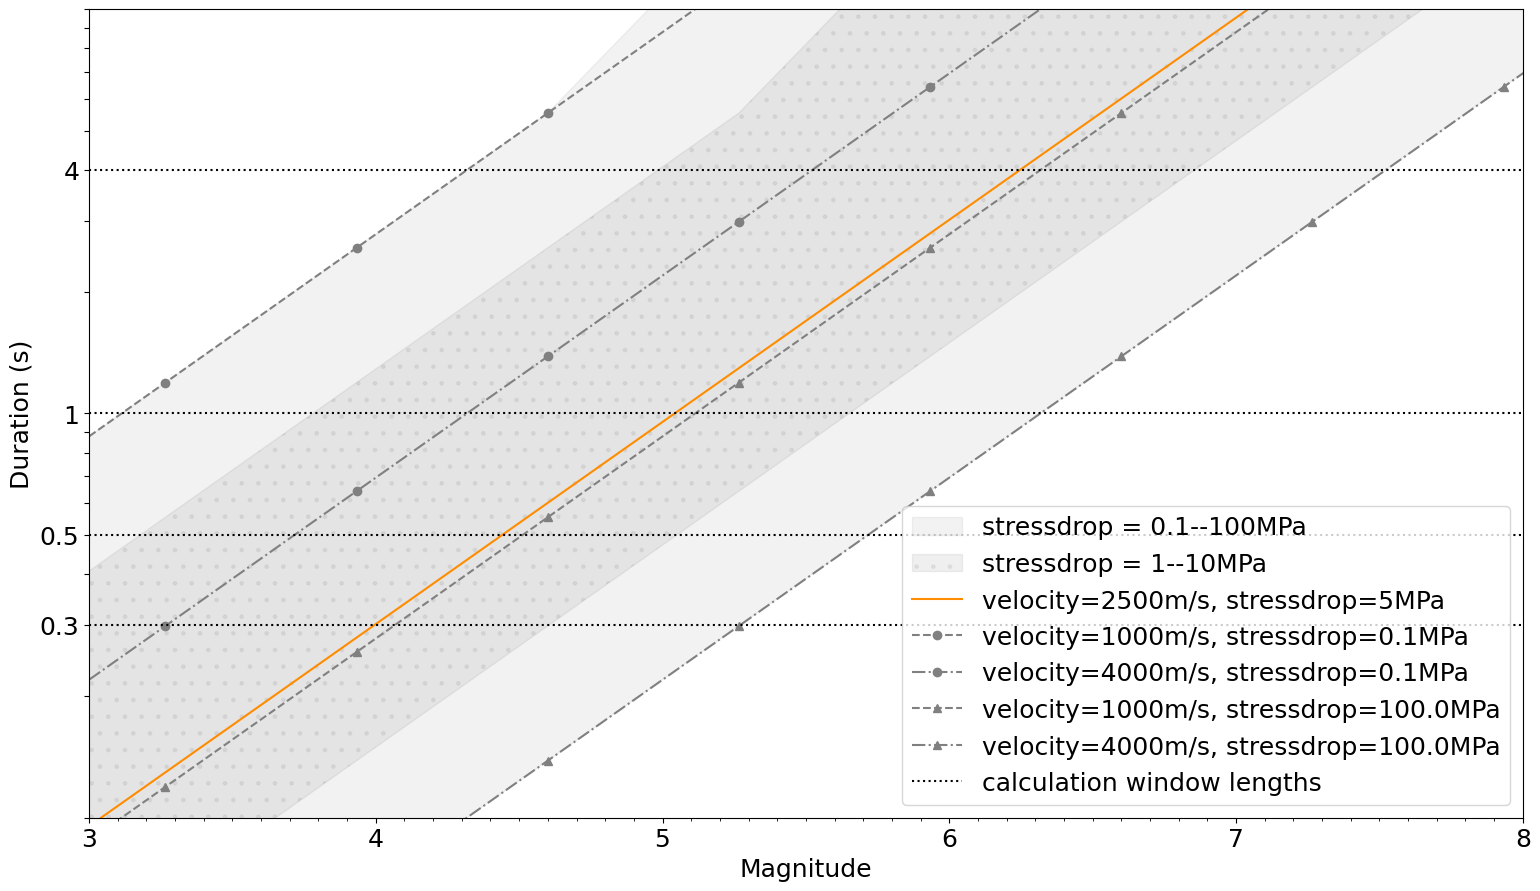

In [16]:
import matplotlib
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(1,1, figsize=(6, 4))
ax.fill_between(list_mags,min_logT, max_logT, alpha = 0.1, color = 'grey', label='stressdrop = 0.1--100MPa')
ax.fill_between(list_mags,min_logT_2, max_logT_2, alpha = 0.1, color = 'dimgrey',hatch = '.', label='stressdrop = 1--10MPa')
ax.plot(list_mags, calc_line_fig1(2500, 5E6, 60E3, list_moments), color='darkorange', label = f'velocity={2500}m/s, stressdrop={5}MPa')
ax.plot(list_mags, calc_line_fig1(min_V, min_stressdrop, 60E3, list_moments), '--o', color='grey',  label = f'velocity={min_V}m/s, stressdrop={min_stressdrop/mpa}MPa')
ax.plot(list_mags, calc_line_fig1(max_V, min_stressdrop, 60E3, list_moments), '-.o', color='grey', label = f'velocity={max_V}m/s, stressdrop={min_stressdrop/mpa}MPa')
ax.plot(list_mags, calc_line_fig1(min_V, max_stressdrop, 60E3, list_moments), '--^', color='grey', label = f'velocity={min_V}m/s, stressdrop={max_stressdrop/mpa}MPa')
ax.plot(list_mags, calc_line_fig1(max_V, max_stressdrop, 60E3, list_moments), '-.^', color='grey', label = f'velocity={max_V}m/s, stressdrop={max_stressdrop/mpa}MPa')

ax.set_ylabel('Duration (s)')
ax.set_xlabel('Magnitude')
ax.set_xlim([3,8])
ax.set_ylim([-1,1])
ax.hlines(np.log10(1), 3,8, color='k', linestyle = ':', label = 'calculation window lengths')
ax.hlines(np.log10(0.5), 3,8, color='k', linestyle = ':')
ax.hlines(np.log10(4), 3,8, color='k', linestyle = ':')
ax.hlines(np.log10(0.3), 3,8, color='k', linestyle = ':')
ax.legend()

y_ticks = [0.3,0.5,1,4]
ax.set_yticks(np.log10(y_ticks))
ax.set_yticklabels(y_ticks)
ax.set_yticks(np.log10([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10]))
ax.set_xticks(np.arange(3,8,0.1), minor=True)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
#plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/duration_for_supplement.png', bbox_inches='tight')